In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
import skgstat as skg
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [2]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [3]:
# Site Name
site_Name = "UK-Amo"

In [4]:
# Constant! 
g = 4.66

# Read images in different sizes

In [5]:
img_10 = rio.open(cwd_Images_Processed + "\\" + site_Name + "\\NIRv 10m.tif")
band_10 = img_10.read(1)
band_10.shape

(1, 1)

In [6]:
img_30 = rio.open(cwd_Images_Processed + "\\" + site_Name + "\\NIRv 30m.tif")
band_30 = img_30.read(1)
band_30.shape

(3, 3)

In [7]:
img_100 = rio.open(cwd_Images_Processed + "\\" + site_Name + "\\NIRv 100m.tif")
band_100 = img_100.read(1)
band_100.shape

(11, 11)

In [8]:
img_300 = rio.open(cwd_Images_Processed + "\\" + site_Name + "\\NIRv 300m.tif")
band_300 = img_300.read(1)
band_300.shape

(31, 31)

In [9]:
img_900 = rio.open(cwd_Images_Processed + "\\" + site_Name + "\\NIRv 900m.tif")
band_900 = img_900.read(1)
band_900.shape

(91, 91)

In [10]:
img_1200 = rio.open(cwd_Images_Processed + "\\" + site_Name + "\\NIRv 1200m.tif")
band_1200 = img_1200.read(1)
band_1200.shape

(121, 121)

In [11]:
# reshape the band arrays into one-dimensional array
band_10_reshape = band_10.reshape(-1)
band_30_reshape = band_30.reshape(-1)
band_100_reshape = band_100.reshape(-1)
band_300_reshape = band_300.reshape(-1)
band_900_reshape = band_900.reshape(-1)
band_1200_reshape = band_1200.reshape(-1)

In [12]:
# Get the coordinates n-dimensional array
list_Coordinates_30 = []
for x in range(img_30.shape[0]):
    for y in range(img_30.shape[1]):
        temp_x, temp_y = img_30.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_30.append(temp_list)
arr_Coordinates_30 = np.array(list_Coordinates_30)
arr_Coordinates_30.shape

(9, 2)

In [13]:
# Get the coordinates n-dimensional array
list_Coordinates_100 = []
for x in range(img_100.shape[0]):
    for y in range(img_100.shape[1]):
        temp_x, temp_y = img_100.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_100.append(temp_list)
arr_Coordinates_100 = np.array(list_Coordinates_100)
arr_Coordinates_100.shape

(121, 2)

In [14]:
# Get the coordinates n-dimensional array
list_Coordinates_300 = []
for x in range(img_300.shape[0]):
    for y in range(img_300.shape[1]):
        temp_x, temp_y = img_300.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_300.append(temp_list)
arr_Coordinates_300 = np.array(list_Coordinates_300)
arr_Coordinates_300.shape

(961, 2)

In [15]:
# Get the coordinates n-dimensional array
list_Coordinates_900 = []
for x in range(img_900.shape[0]):
    for y in range(img_900.shape[1]):
        temp_x, temp_y = img_900.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_900.append(temp_list)
arr_Coordinates_900 = np.array(list_Coordinates_900)
arr_Coordinates_900.shape

(8281, 2)

In [16]:
# Get the coordinates n-dimensional array
list_Coordinates_1200 = []
for x in range(img_1200.shape[0]):
    for y in range(img_1200.shape[1]):
        temp_x, temp_y = img_1200.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_1200.append(temp_list)
arr_Coordinates_1200 = np.array(list_Coordinates_1200)
arr_Coordinates_1200.shape

(14641, 2)

In [17]:
# Get the maximum lag
diagonal_30 = 30 * (2 ** 0.5) / 2
bin_30 = np.arange(10,diagonal_30,10)
bin_30[-1]

20.0

In [18]:
# Get the maximum lag
diagonal_100 = 100 * (2 ** 0.5) / 2
bin_100 = np.arange(10,diagonal_100,10)
bin_100[-1]

70.0

In [19]:
# Get the maximum lag
diagonal_300 = 300 * (2 ** 0.5) / 2
bin_300 = np.arange(10,diagonal_300,10)
bin_300[-1]

210.0

In [20]:
# Get the maximum lag
diagonal_900 = 900 * (2 ** 0.5) / 2
bin_900 = np.arange(10,diagonal_900,10)
bin_900[-1]

630.0

In [21]:
# Get the maximum lag
diagonal_1200 = 1200 * (2 ** 0.5) / 2
bin_1200 = np.arange(10,diagonal_1200,10)
bin_1200[-1]

840.0

# Variogram

## Variogram

In [59]:
V_30 = skg.Variogram(arr_Coordinates_30, band_30_reshape, use_nugget=True, bin_func=bin_30, maxlag = bin_30[-1])
V_100 = skg.Variogram(arr_Coordinates_100, band_100_reshape, use_nugget=True, bin_func=bin_100, maxlag = bin_100[-1])
V_300 = skg.Variogram(arr_Coordinates_300, band_300_reshape, use_nugget=True, bin_func=bin_300, maxlag = bin_300[-1])
V_900 = skg.Variogram(arr_Coordinates_900, band_900_reshape, use_nugget=True, bin_func=bin_900, maxlag = bin_900[-1])
V_1200 = skg.Variogram(arr_Coordinates_1200, band_1200_reshape, use_nugget=True, bin_func=bin_1200, maxlag = bin_1200[-1])

c:\ProgramData\Anaconda3\envs\DISC\Lib\site-packages\skgstat\Variogram.py:1715: OptimizeWarning: Covariance of the parameters could not be estimated
  self.cof, self.cov = curve_fit(


### Variogram Parameters

In [60]:
range_30 = V_30.parameters[0]
sill_30 = V_30.parameters[1] + V_300.parameters[2]
nugget_30 = V_30.parameters[2]
range_100 = V_100.parameters[0]
sill_100 = V_100.parameters[1] + V_100.parameters[2]
nugget_100 = V_100.parameters[2]
range_300 = V_300.parameters[0]
sill_300 = V_300.parameters[1] + V_300.parameters[2]
nugget_300 = V_300.parameters[2]
range_900 = V_900.parameters[0]
sill_900 = V_900.parameters[1] + V_900.parameters[2]
nugget_900 = V_900.parameters[2]
range_1200 = V_1200.parameters[0]
sill_1200 = V_1200.parameters[1] + V_1200.parameters[2]
nugget_1200 = V_1200.parameters[2]
print("30m Range: " + str(range_30) + "; Sill: " + str(sill_30) + "; Nugget: " + str(nugget_30))
print("100m Range: " + str(range_100) + "; Sill: " + str(sill_100) + "; Nugget: " + str(nugget_100))
print("300m Range: " + str(range_300) + "; Sill: " + str(sill_300) + "; Nugget: " + str(nugget_300))
print("900m Range: " + str(range_900) + "; Sill: " + str(sill_900) + "; Nugget: " + str(nugget_900))
print("1200m Range: " + str(range_1200) + "; Sill: " + str(sill_1200) + "; Nugget: " + str(nugget_1200))

30m Range: 19.999999998; Sill: 22.270056661105077; Nugget: 2.1504344926670713
100m Range: 45.819817259767596; Sill: 12.348971561166366; Nugget: 2.7633986391071014e-31
300m Range: 209.99999999999997; Sill: 537.455216930264; Nugget: 20.09790059691626
900m Range: 629.9999999999999; Sill: 1185.8839797893515; Nugget: 84.90598294406682
1200m Range: 557.75687339235; Sill: 1266.5010780076022; Nugget: 5.556691390969052


## Roman Metrics

### CV (Coefficient of Variation)

In [61]:
CV_30 = np.std(band_30) / np.mean(band_30)
CV_100 = np.std(band_100) / np.mean(band_100)
CV_300 = np.std(band_300) / np.mean(band_300)
CV_900 = np.std(band_900) / np.mean(band_900)
CV_1200 = np.std(band_1200) / np.mean(band_1200)

### Rcv (Relative Coefficient of Variation)

In [62]:
Rcv_30_100 = (CV_100 - CV_30) / CV_30
Rcv_30_300 = (CV_300 - CV_30) / CV_30
Rcv_100_300 = (CV_300 - CV_100) / CV_100
Rcv_300_900 = (CV_900 - CV_300) / CV_300
Rcv_300_1200 = (CV_1200 - CV_300) / CV_300

### RAW Score

In [63]:
RAW_30_100 = (abs(2 * Rcv_30_100)) ** (-1)
RAW_30_300 = (abs(2 * Rcv_30_300)) ** (-1)
RAW_100_300 = (abs(2 * Rcv_100_300)) ** (-1)
RAW_300_900 = (abs(2 * Rcv_300_900)) ** (-1)
RAW_300_1200 = (abs(2 * Rcv_300_1200)) ** (-1)

### Rse (Scale Requirement)

In [64]:
Rse_30_100 = math.exp(-((g / range_30) ** 2 + (g / range_100) ** 2) ** (1/2))
Rse_30_300 = math.exp(-((g / range_30) ** 2 + (g / range_300) ** 2) ** (1/2))
Rse_100_300 = math.exp(-((g / range_100) ** 2 + (g / range_300) ** 2) ** (1/2))
Rse_300_900 = math.exp(-((g / range_300) ** 2 + (g / range_900) ** 2) ** (1/2))
Rse_300_1200 = math.exp(-((g / range_300) ** 2 + (g / range_1200) ** 2) ** (1/2))

### Rst (Spatial Correlation)

In [65]:
# Get the index of the range in the bin
for i in range(len(V_30.bins)):
    if range_30 >= V_30.bins[i] and range_30 <= V_30.bins[i+1]:
        index_30 = i + 1
estimator_Range_30 = V_30.experimental[index_30]
print(f"The range {(range_30)} falls in {V_30.bins[index_30 - 1]} and {V_30.bins[index_30]}, whose value is {estimator_Range_30}")

for i in range(len(V_100.bins)):
    if range_100 >= V_100.bins[i] and range_100 <= V_100.bins[i+1]:
        index_100 = i + 1
estimator_Range_100 = V_100.experimental[index_100]
print(f"The range {(range_100)} falls in {V_100.bins[index_100 - 1]} and {V_100.bins[index_100]}, whose value is {estimator_Range_100}")

for i in range(len(V_300.bins)):
    if range_300 >= V_300.bins[i] and range_300 <= V_300.bins[i+1]:
        index_300 = i + 1
estimator_Range_300 = V_300.experimental[index_300]
print(f"The range {(range_300)} falls in {V_300.bins[index_300 - 1]} and {V_300.bins[index_300]}, whose value is {estimator_Range_300}")

for i in range(len(V_900.bins)):
    if range_900 >= V_900.bins[i] and range_900 <= V_900.bins[i+1]:
        index_900 = i + 1
estimator_Range_900 = V_900.experimental[index_900]
print(f"The range {(range_900)} falls in {V_900.bins[index_900 - 1]} and {V_900.bins[index_900]}, whose value is {estimator_Range_900}")

for i in range(len(V_1200.bins)):
    if range_1200 >= V_1200.bins[i] and range_1200 <= V_1200.bins[i+1]:
        index_1200 = i + 1
estimator_Range_1200 = V_1200.experimental[index_1200]
print(f"The range {(range_1200)} falls in {V_1200.bins[index_1200 - 1]} and {V_1200.bins[index_1200]}, whose value is {estimator_Range_1200}")

The range 19.999999998 falls in 10.0 and 20.0, whose value is 4.322590555998873
The range 45.819817259767596 falls in 40.0 and 50.0, whose value is 13.421850295997213
The range 209.99999999999997 falls in 200.0 and 210.0, whose value is 607.7999918033754
The range 629.9999999999999 falls in 620.0 and 630.0, whose value is 1252.3881715914326
The range 557.75687339235 falls in 550.0 and 560.0, whose value is 1294.3284597140557


In [66]:
ST_30 = (estimator_Range_30 - nugget_30) / estimator_Range_30
ST_100 = (estimator_Range_100 - nugget_100) / estimator_Range_100
ST_300 = (estimator_Range_300 - nugget_300) / estimator_Range_300
ST_900 = (estimator_Range_900 - nugget_900) / estimator_Range_900
ST_1200 = (estimator_Range_1200 - nugget_1200) / estimator_Range_1200
Rst_30_100 = (ST_100 - ST_30) / ST_30
Rst_30_300 = (ST_300 - ST_30) / ST_30
Rst_100_300 = (ST_300 - ST_100) / ST_100
Rst_300_900 = (ST_900 - ST_300) / ST_300
Rst_300_1200 = (ST_1200 - ST_300) / ST_300

### Rsv Structural Variability

In [67]:
def f_30_SV(x):
    return (V_30.fitted_model(x) - nugget_30) / sill_30
def f_100_SV(x):
    return (V_100.fitted_model(x) - nugget_100) / sill_100
def f_300_SV(x):
    return (V_300.fitted_model(x) - nugget_300) / sill_300
def f_900_SV(x):
    return (V_900.fitted_model(x) - nugget_900) / sill_900
def f_1200_SV(x):
    return (V_1200.fitted_model(x) - nugget_1200) / sill_1200
SV_30 = quad(f_30_SV, 0, range_30)[0]
SV_100 = quad(f_100_SV, 0, range_100)[0]
SV_300 = quad(f_300_SV, 0, range_300)[0]
SV_900 = quad(f_900_SV, 0, range_900)[0]
SV_1200 = quad(f_1200_SV, 0, range_1200)[0]
Rsv_30_100 = (SV_100 - SV_30) / SV_30
Rsv_30_300 = (SV_300 - SV_30) / SV_30
Rsv_100_300 = (SV_300 - SV_100) / SV_100
Rsv_300_900 = (SV_900 - SV_300) / SV_300
Rsv_300_1200 = (SV_1200 - SV_300) / SV_300

### ST Score

In [68]:
ST_Score_30_100 = (abs(Rcv_30_100) / 3 + abs(Rst_30_100) / 3 + abs(Rsv_30_100) / 3 +Rse_30_100) ** (-1)
ST_Score_30_300 = (abs(Rcv_30_300) / 3 + abs(Rst_30_300) / 3 + abs(Rsv_30_300) / 3 +Rse_30_300) ** (-1)
ST_Score_100_300 = (abs(Rcv_100_300) / 3 + abs(Rst_100_300) / 3 + abs(Rsv_100_300) / 3 +Rse_100_300) ** (-1)
ST_Score_300_900 = (abs(Rcv_300_900) / 3 + abs(Rst_300_900) / 3 + abs(Rsv_300_900) / 3 +Rse_300_900) ** (-1)
ST_Score_300_1200 = (abs(Rcv_300_1200) / 3 + abs(Rst_300_1200) / 3 + abs(Rsv_300_1200) / 3 +Rse_300_1200) ** (-1)

# Final Results

In [69]:
df_Variogram = pd.DataFrame({
    "Site": site_Name,
    "Distance": ['30m', '100m', '300m', '900m', '1200m'],
    "Range": [range_30, range_100, range_300, range_900, range_1200],
    "Sill": [sill_30, sill_100, sill_300, sill_900, sill_1200],
    "Nugget": [nugget_30, nugget_100, nugget_300, nugget_900, nugget_1200],    
    "CV": [CV_30, CV_100, CV_300, CV_900, CV_1200]
})
df_Variogram

,Site,Distance,Range,Sill,Nugget,CV
0,UK-Amo,30m,20.000000,22.270057,2.150434e+00,0.043983
1,UK-Amo,100m,45.819817,12.348972,2.763399e-31,0.064372
2,UK-Amo,300m,210.000000,537.455217,2.009790e+01,0.382944
3,UK-Amo,900m,630.000000,1185.883980,8.490598e+01,0.454213
4,UK-Amo,1200m,557.756873,1266.501078,5.556691e+00,0.487963


In [70]:
df_Roman = pd.DataFrame({
    "Site": site_Name,
    "Internal Distance": ['30m', '30m', '100m', '300m', '300m'],
    "External Distance": ['100m', '300m', '300m', '900m', '1200m'],
    "Rcv": [Rcv_30_100, Rcv_30_300, Rcv_100_300, Rcv_300_900, Rcv_300_1200],
    "Rse": [Rse_30_100, Rse_30_300, Rse_100_300, Rse_300_900, Rse_300_1200],
    "Rst": [Rst_30_100, Rst_30_300, Rst_100_300, Rst_300_900, Rst_300_1200],
    "Rsv": [Rsv_30_100, Rsv_30_300, Rsv_100_300, Rsv_300_900, Rsv_300_1200],
    "RAW Score": [RAW_30_100, RAW_30_300, RAW_100_300, RAW_300_900, RAW_300_1200],
    "ST Score": [ST_Score_30_100, ST_Score_30_300, ST_Score_100_300, ST_Score_300_900, ST_Score_300_1200]
})
df_Roman

,Site,Internal Distance,External Distance,Rcv,Rse,Rst,Rsv,RAW Score,ST Score
0,UK-Amo,30m,100m,0.463575,0.775514,0.990000,3.517310,1.078575,0.411104
1,UK-Amo,30m,300m,7.706643,0.791319,0.924197,18.929396,0.064879,0.100220
2,UK-Amo,100m,300m,4.948888,0.901139,-0.033067,3.411784,0.101033,0.270340
3,UK-Amo,300m,900m,0.186106,0.976881,-0.035916,1.893406,2.686635,0.594522
4,UK-Amo,300m,1200m,0.274239,0.976568,0.029758,1.747057,1.823230,0.602318


In [71]:
df_Roman.to_csv(cwd_Images_Processed + "\\" + site_Name + "\\Result_New_Roman.csv", index = False)
df_Variogram.to_csv(cwd_Images_Processed + "\\" + site_Name + "\\Result_New_Variogram.csv", index = False)

### Variogram Plot AIO!

In [72]:
# Get the theoretical functions
# def f_30(x):
#    return V_30.fitted_model(x)
def f_100(x):
   return V_100.fitted_model(x)
def f_300(x):
   return V_300.fitted_model(x)
def f_900(x):
   return V_900.fitted_model(x)
def f_1200(x):
   return V_1200.fitted_model(x)
# Create cubic interpolation model in order to make curved plot (otherwise it will be ugly af)
# cubic_model_30 = interp1d(np.concatenate((np.array([0]),bin_30)), f_30(np.concatenate((np.array([0]),bin_30)),), kind = "cubic")
cubic_model_100 = interp1d(np.concatenate((np.array([0]),bin_100)), f_100(np.concatenate((np.array([0]),bin_100)),), kind = "cubic")
cubic_model_300 = interp1d(np.concatenate((np.array([0]),bin_300)), f_300(np.concatenate((np.array([0]),bin_300)),), kind = "cubic")
cubic_model_900 = interp1d(np.concatenate((np.array([0]),bin_900)), f_900(np.concatenate((np.array([0]),bin_900)),), kind = "cubic")
cubic_model_1200 = interp1d(np.concatenate((np.array([0]),bin_1200)), f_1200(np.concatenate((np.array([0]),bin_1200)),), kind = "cubic")
x_30 = np.linspace(0,bin_30[-1])
x_100 = np.linspace(0,bin_100[-1])
x_300 = np.linspace(0,bin_300[-1])
x_900 = np.linspace(0,bin_900[-1])
x_1200 = np.linspace(0,bin_1200[-1])

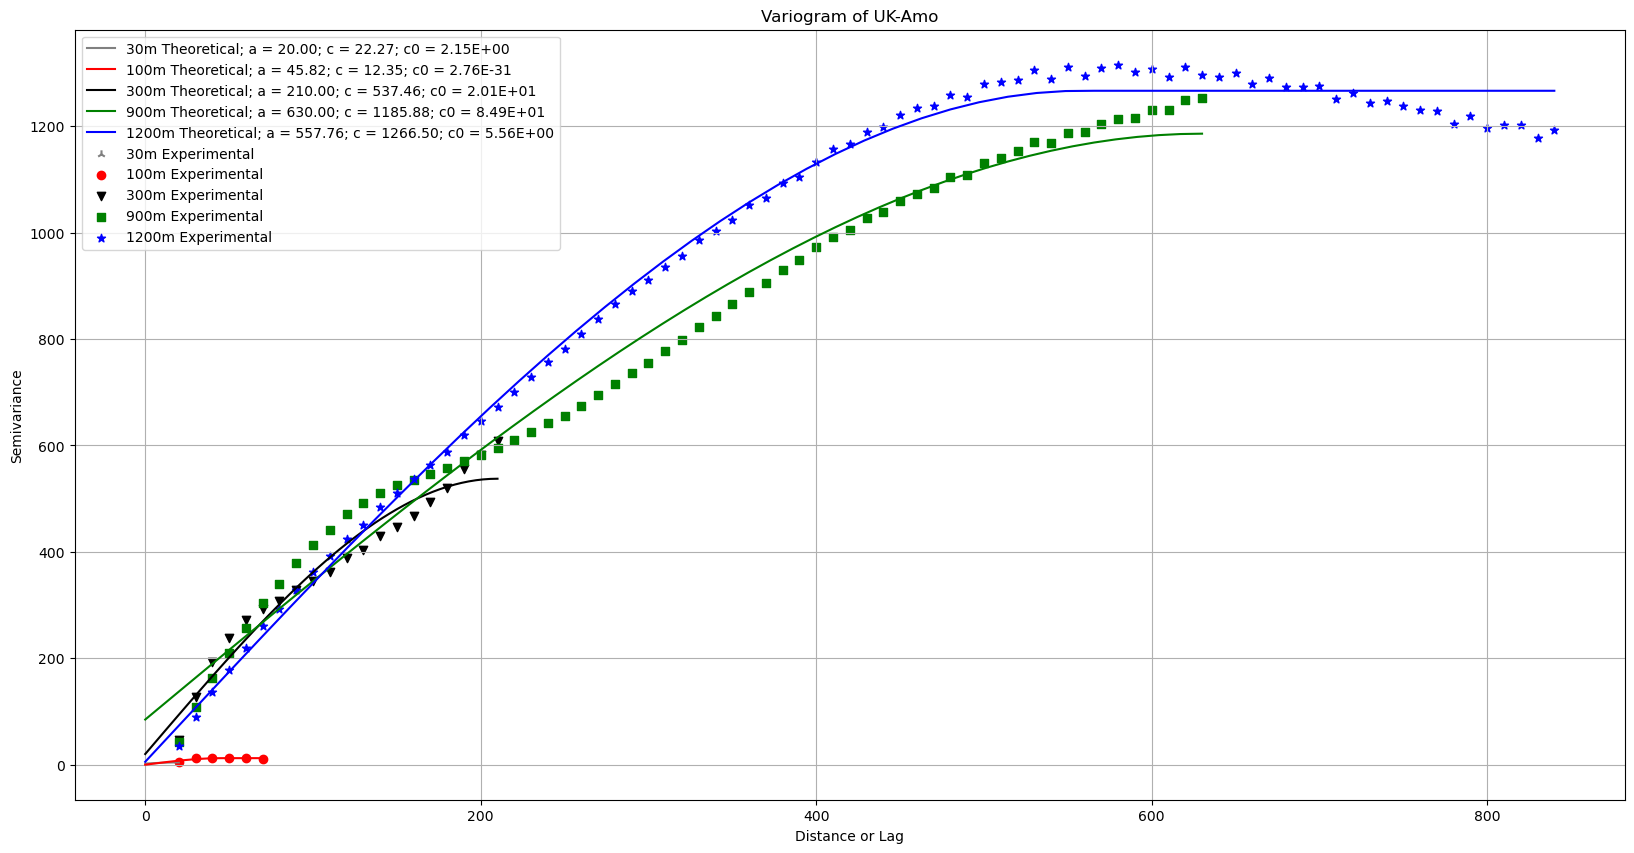

In [73]:
# Plot! 
plt.figure(figsize = (20,10))
plt.plot(x_30, V_30.fitted_model(x_30), label = f'30m Theoretical; a = {range_30:.2F}; c = {sill_30:.2F}; c0 = {nugget_30:.2E}', color = 'Grey', linestyle = '-')
plt.plot(x_100, cubic_model_100(x_100), label = f'100m Theoretical; a = {range_100:.2F}; c = {sill_100:.2F}; c0 = {nugget_100:.2E}', color = 'Red', linestyle = '-')
plt.plot(x_300, cubic_model_300(x_300), label = f'300m Theoretical; a = {range_300:.2F}; c = {sill_300:.2F}; c0 = {nugget_300:.2E}', color = 'Black', linestyle = '-')
plt.plot(x_900, cubic_model_900(x_900), label = f'900m Theoretical; a = {range_900:.2F}; c = {sill_900:.2F}; c0 = {nugget_900:.2E}', color = 'Green', linestyle = '-')
plt.plot(x_1200, cubic_model_1200(x_1200), label = f'1200m Theoretical; a = {range_1200:.2F}; c = {sill_1200:.2F}; c0 = {nugget_1200:.2E}', color = 'Blue', linestyle = '-')
plt.scatter(V_30.get_empirical()[0],V_30.get_empirical()[1], color = 'Grey', label = '30m Experimental', marker = '2')
plt.scatter(V_100.get_empirical()[0],V_100.get_empirical()[1], color = 'Red', label = '100m Experimental', marker = 'o')
plt.scatter(V_300.get_empirical()[0],V_300.get_empirical()[1], color = 'Black', label = '300m Experimental', marker = 'v')
plt.scatter(V_900.get_empirical()[0],V_900.get_empirical()[1], color = 'Green', label = '900m Experimental', marker = 's')
plt.scatter(V_1200.get_empirical()[0],V_1200.get_empirical()[1], color = 'Blue', label = '1200m Experimental', marker = '*')
plt.title("Variogram of " + site_Name)
plt.xlabel("Distance or Lag")
plt.ylabel("Semivariance")
plt.legend()
plt.grid()
plt.savefig(cwd_Images_Processed + "\\" + site_Name + "\\Result.png")

In [74]:
V_30.get_empirical()

(array([10., 20.]), array([       nan, 4.32259056]))